# Options Pricing Group Project (Gabe Owens, Yuan-Cheng Tsai)

# Initial Data Quality Checks/Cleaning/Standardizing  

## Load DataSets/Dummy Variable Conversion 

In [19]:
#Load all datasets 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
group_pred = pd.read_csv("group_0_prediction.csv")
option_test = pd.read_csv('option_test_wolabel.csv')
option_train = pd.read_csv("option_train.csv")
#Convert 'BS' to a dummy variable (0 if Under, 1 if Over)
option_train['BS']=option_train['BS'].apply(lambda x: 1 if x == 'Over' else 0)

## Display All DataSets

In [20]:
#Display All DataSets
from IPython.core.display import display, HTML
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
display_side_by_side([group_pred.head(), option_test.head(), option_train.head()], ['Group Predictions', 'Test Data', 
                                                                                    'Training Data'])

## Quality Checks on Training Data

In [21]:
#Quality Checks on Training Data
print('Info:', sep='\n')
print(option_train.info())
print()
print('Descriptive Stats:', sep='\n')
print(option_train.describe())
print()
print('Null Value Count:', option_train.isnull().sum(), sep='\n')
print()
print('Duplicate Value Count:')
print(option_train.duplicated().sum())
print()
print('Shape:', option_train.shape, sep='\n')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1679 non-null   float64
 1   S       1679 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1679 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.9 KB
None

Descriptive Stats:
             Value            S            K          tau            r  \
count  1679.000000  1679.000000  1678.000000  1679.000000  1680.000000   
mean     15.072013   440.639445   438.241955     0.437519     0.030235   
std      14.036492    13.130436    23.408989     7.057555     0.000557   
min       0.125000     0.000000   375.000000     0.003968     0.029510   
25%       2.255002   433.863864   420.000000     0.119048     0.029820   
50%      11.220588   442.525366   440.000000     0.202381     0.030130  

## Drop Null Values in Training Data 

In [22]:
#Drop Null Values in Training Data 
option_train = option_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('Null Value Count:', option_train.isnull().sum(), sep='\n')
print()
print('New Shape:', option_train.shape, sep='\n')

Null Value Count:
Value    0
S        0
K        0
tau      0
r        0
BS       0
dtype: int64

New Shape:
(1678, 6)


## Outlier Visualization (Excluding 'BS')

Original Skews:
K skew: 0.09760174103507052
S skew: -22.577206096818195
Value skew: 0.7349212221963913
r skew: 1.2358783187225972
tau skew: 31.607019444736878


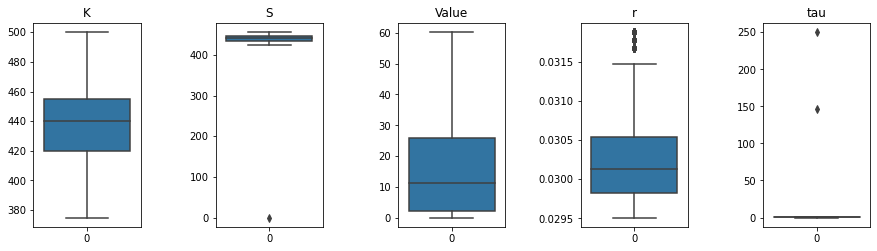

In [23]:
#Outlier Visualization (Excluding 'BS') 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(15, 15))
count=1
for i in option_train.columns.difference(['BS']):
    plt.subplot(2,5,count)
    sns.boxplot(data=option_train[i]).set_title(i)
    count+=1
plt.subplots_adjust(hspace=2, wspace=.7)
print('Original Skews:', sep='\n')
for i in option_train.columns.difference(['BS']):
    print(i,'skew:',(option_train[i].skew()))

## Find Extreme Values and Remove Them 

In [24]:
#Find Extreme Values and Remove Them 
col = option_train.columns.difference(['BS'])
for i in col:
    Q1 = option_train[i].quantile(0.25)
    Q3 = option_train[i].quantile(0.75)
    IQR = Q3 - Q1
    print(i,':')
    print(option_train.loc[(option_train[i] < (Q1 - 3 * IQR)) | (option_train[i] > (Q3 + 3 * IQR))])
    condition = ~((option_train[i] < (Q1 - 3 * IQR)) | (option_train[i] > (Q3 + 3 * IQR)))
    option_train = option_train[condition]

K :
Empty DataFrame
Columns: [Value, S, K, tau, r, BS]
Index: []
S :
     Value    S      K       tau        r  BS
879  4.125  0.0  455.0  0.170635  0.03003   1
Value :
Empty DataFrame
Columns: [Value, S, K, tau, r, BS]
Index: []
r :
Empty DataFrame
Columns: [Value, S, K, tau, r, BS]
Index: []
tau :
       Value           S      K    tau        r  BS
12  2.315001  448.688109  470.0  250.0  0.03013   1
33  2.565000  445.042240  455.0  146.0  0.03003   1


## Final Skew Values and Dataset Shape 

In [25]:
#Final Skew Values and Dataset Shape 
print('Final Skews:', sep='\n')
for i in option_train.columns.difference(['BS']):
    print(i,'skew:',(option_train[i].skew()))
print()
print('Final Shape:', option_train.shape, sep='\n')

Final Skews:
K skew: 0.10083342984947408
S skew: -0.22652462714817947
Value skew: 0.7322637711951554
r skew: 1.2335201609700461
tau skew: -0.08777009408890274

Final Shape:
(1675, 6)


## Train/Test Split on Dataset

In [18]:
#Train/Test Split on Dataset
from sklearn.model_selection import train_test_split
X=option_train[['K','S','r','tau']]
y=option_train[['Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
option_train_train = pd.DataFrame(X_train, columns = ['K', 'S', 'r', 'tau'])
y_train = pd.DataFrame(y_train, columns = ['Value'])
option_train_train['Value']= y_train
option_train_test = pd.DataFrame(X_test, columns = ['K', 'S', 'r', 'tau'])
y_test = pd.DataFrame(y_test, columns = ['Value'])
option_train_test['Value']= y_test
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1172, 4)
y_train shape: (1172, 1)
X_test shape: (503, 4)
y_test shape: (503, 1)


## Normalizing data using MinMaxScaler()

- We added a very small number (.0000000000001) to both the train/test split data to allow for more transformations (ex: 1/x or log(x))

In [10]:
#Normalizing data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
num_cols = option_train_train.columns.difference(['Value'])
for i in num_cols:
    scale = MinMaxScaler().fit(option_train_train[[i]])
    option_train_train[i] = scale.transform(option_train_train[[i]])
num_cols = option_train_test.columns.difference(['Value'])
for i in num_cols:
    scale = MinMaxScaler().fit(option_train_test[[i]])
    option_train_test[i] = scale.transform(option_train_test[[i]])
option_train_train = option_train_train + .0000000000001
option_train_test = option_train_test +   .0000000000001
y_test = option_train_test['Value']
option_train_test = option_train_test.drop(columns=['Value'])
print(round(option_train_train.head(),3))
round(option_train_train.describe(),3)

         K      S      r    tau   Value
64    0.60  0.674  0.304  0.908  11.250
481   0.64  0.235  0.827  0.459   0.970
282   0.40  0.719  0.046  0.490  26.666
1611  0.68  0.453  0.304  0.735   1.755
1018  0.36  0.258  0.177  0.020  14.120


,K,S,r,tau,Value
count,1172.000,1172.000,1172.000,1172.000,1172.000
mean,0.510,0.512,0.304,0.510,14.750
std,0.185,0.248,0.234,0.254,13.915
min,0.000,0.000,0.000,0.000,0.125
25%,0.360,0.277,0.131,0.306,2.125
50%,0.520,0.590,0.262,0.510,10.666
75%,0.640,0.719,0.435,0.724,24.918
max,1.000,1.000,1.000,1.000,60.149


# Data Analysis 

## Regression (Value)

### GridSearchCV

For all regressors, we will use GridSearchCV to find the best combination of tuned hyperparameters.

We will then return the average cross-validated score of the specific Regressor.

In [485]:
from sklearn.model_selection import GridSearchCV

### Lasso Regression 

In [480]:
from sklearn import linear_model
model = linear_model.Lasso()
forest_params = {'alpha': [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='r2')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('RSquared: ', clf.best_score_)

Best Parameters:  {'alpha': 0.005}
RSquared:  0.9094789702205934


In [481]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import linear_model
X = option_train[feature_cols]
y = option_train["Value"]
model = linear_model.Lasso(alpha=0.005).fit(X_train, y_train)
y_pred = model.predict(X_test) 
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (R2) Score", np.mean(cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)))

Mean Cross Val (R2) Score 0.9105461522997921


### Ridge Regression

In [491]:
from sklearn.linear_model import Ridge
model = Ridge()
forest_params = {'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], 'alpha':[1]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='r2')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('RSquared: ', clf.best_score_)

Best Parameters:  {'alpha': 1, 'solver': 'auto'}
RSquared:  0.9091558617141151


In [492]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0, solver = 'auto').fit(X_train, y_train)
y_pred = model.predict(X_test) 
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (R2) Score", np.mean(cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)))

Mean Cross Val (R2) Score 0.910311667096764


### Decision Tree Regressor 

In [494]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
forest_params = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='r2')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('RSquared: ', clf.best_score_)

Best Parameters:  {'max_depth': 11, 'splitter': 'best'}
RSquared:  0.9888647563862423


In [495]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=11, splitter='best', random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test) 
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (R2) Score", np.mean(cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)))

Mean Cross Val (R2) Score 0.990953127367164


### ElasticNet Regression 

In [499]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
forest_params = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='r2')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('RSquared: ', clf.best_score_)

Best Parameters:  {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 5}
RSquared:  0.9094837210433822


In [500]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.0001, l1_ratio = 0.0, max_iter =5, random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test) 
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (R2) Score", np.mean(cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)))

Mean Cross Val (R2) Score 0.9105567386332925


### Linear Regression 

In [467]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pred = model.predict(X_test) 
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (R2) Score", np.mean(cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)))

Mean Cross Val (R2) Score 0.9107469509112591


### Attempting to Form the Best Linear Regression Equation:

While we divided the samples into training and testing sets, we will be doing the regression model fit tests on our training data, and will find the equation with the highest cross-validated Adjusted R2. We will then check the performance of the final model on the unseen test data. This helps endure there was no overfitting. We are also doing it this way to avoid data leakage, where knowledge of the test set leaks into the dataset used to train the model. 

In addition, from now on, we are using Adjusted RSquared instead of R2 for training data because: 
- R^2 does not include a penalty for model complexity and will pick the model with the most variables while Adjusted RSquared does include a penalty for adding more predictors. 
- R2-value is a function of the mean square error (MSE). 
- R2-value increases only if MSE decreases. That is, the adjusted R2-value and MSE criteria always yield the same "best" models

For the linear regression portion of this project, we will compare Adjusted RSquared values for different models using our training data, then test our final model on the test data. 

### Initial Linear Regression Tests

In [391]:
#Initial Linear Regression Tests
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
X = list(option_train_train.columns.difference(['Value','BS']))
y = list(option_train_train["Value"])
def powerset(iterable): 
    s = list(iterable) 
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1)) 
R2 = {}
model=LinearRegression()
for subset in powerset(X):
    if len(subset) > 0:
        model.fit(option_train_train[list(subset)],y)
        R2_value = model.score(option_train_train[list(subset)],y)
        R2.update({subset: R2_value})
        print('Predictors:', subset,'  RSquared:', R2_value)
print()
print('The best regression equation has predictors:', max(R2, key=R2.get) ,'with an RSquared of:', max(R2.values()))
print('However, the most important predictors are K and S and tau with an RSquared of .91276.')

Predictors: ('K',)   RSquared: 0.7860988875720014
Predictors: ('S',)   RSquared: 0.005840156504013705
Predictors: ('r',)   RSquared: 0.0014867135061327197
Predictors: ('tau',)   RSquared: 0.0024604877873176667
Predictors: ('K', 'S')   RSquared: 0.8650910086134567
Predictors: ('K', 'r')   RSquared: 0.8000859342499749
Predictors: ('K', 'tau')   RSquared: 0.8109362561744098
Predictors: ('S', 'r')   RSquared: 0.012594582272823174
Predictors: ('S', 'tau')   RSquared: 0.0098411623771536
Predictors: ('r', 'tau')   RSquared: 0.0038882515000855378
Predictors: ('K', 'S', 'r')   RSquared: 0.865103598800637
Predictors: ('K', 'S', 'tau')   RSquared: 0.9127552344188956
Predictors: ('K', 'r', 'tau')   RSquared: 0.8263809415834936
Predictors: ('S', 'r', 'tau')   RSquared: 0.017360962869397034
Predictors: ('K', 'S', 'r', 'tau')   RSquared: 0.9130010611706952

The best regression equation has predictors: ('K', 'S', 'r', 'tau') with an RSquared of: 0.9130010611706952
However, the most important predictor

### Analysis 

- We see that K is a necessity for a strong model fit, so we include it in every future model. Including S and tau provides stronger R2 values than when including r. Therefore, K+S+tau is the most necessary (as the jump from RSquared values of .91276 to .91300 is not large enough to justify adding the additional variable r. Next, we will test transformations on the predictors. 

### Interaction Terms 

In [291]:
#Interaction Terms 
import statsmodels.formula.api as smf
for i in list(option_train.columns.difference(['Value','BS','r'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + r*{i}', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + r*{i} ', '  Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','r','S'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + S*{i}', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + S*{i} ', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + K * tau', data=option_train_train).fit()
print(f'Preditors: K + S + r + tau + K*tau', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K*S*r', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K*S*r', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + K*S*tau', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K*S*tau', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + K*r*tau', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K*r*tau', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + S*r*tau', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + S*r*tau', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + K*S*r*tau', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K*r*S*tau', '  Adj RSquared:', result1.rsquared_adj)
print()
print('The Adj RSquared values for all interaction terms are very similar and equally beneficial')
print('For simplicity, and also to limit the total number of predictors, \
we will include the most important predictor as K*S, with Adj RSquared value: 0.9135')

Preditors: K + r + S + tau + r*K    Adj RSquared: 0.9134008657996627
Preditors: K + r + S + tau + r*S    Adj RSquared: 0.9127797786198377
Preditors: K + r + S + tau + r*tau    Adj RSquared: 0.9127825851191467
Preditors: K + r + S + tau + S*K    Adj RSquared: 0.913500468539426
Preditors: K + r + S + tau + S*tau    Adj RSquared: 0.9126364013079261
Preditors: K + S + r + tau + K*tau   Adj RSquared: 0.9178016895756905
Preditors: K + r + S + tau + K*S*r   Adj RSquared: 0.8697521324225653
Preditors: K + r + S + tau + K*S*tau   Adj RSquared: 0.9193029021929917
Preditors: K + r + S + tau + K*r*tau   Adj RSquared: 0.9196938924159708
Preditors: K + r + S + tau + S*r*tau   Adj RSquared: 0.9127478695272224
Preditors: K + r + S + tau + K*r*S*tau   Adj RSquared: 0.9222609306798204

The Adj RSquared values for all interaction terms are very similar and equally beneficial
For simplicity, and also to limit the total number of predictors, we will include the most important predictor as K*S, with Adj RSq

### Exponential Transformations (Non-linear)

In [292]:
#Non-linear Transformations (Exponential) 
for i in list(option_train.columns.difference(['Value','BS'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.power({i}, 2)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^2 ', '  Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','K'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(K, 2) + np.power({i}, 2)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + K^2 + {i}^2 ', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','K','S'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(S, 2) + np.power({i}, 2)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + S^2 + {i}^2 ', ' Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(r, 2) + np.power(tau, 2)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + r^2 + tau^2 ', ' Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(K, 2) + np.power(S, 2) + np.power(r, 2)', 
                  data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K^2 + S^2 + r^2 ', ' Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(K, 2) + np.power(S, 2) + np.power(tau, 2)', 
                  data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K^2 + S^2 + tau^2 ', ' Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(K, 2) + np.power(r, 2) + np.power(tau, 2)', 
                  data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K^2 + r^2 + tau^2 ', ' Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(S, 2) + np.power(r, 2) + np.power(tau, 2)', 
                  data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + S^2 + r^2 + tau^2 ', ' Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + r + S + tau + np.power(K, 2) + np.power(r, 2) + np.power(S,2) + np.power(tau,2)', 
                  data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + K^2 + r^2 + S^2 + tau^2', '  Adj RSquared:', result1.rsquared_adj)
print()
print('We can see the most important predictor is K^2 from its impact on Adj RSquared values - every Adj R2 is >.96')

Preditors: K + r + S + tau + K^2    Adj RSquared: 0.9678956954046828
Preditors: K + r + S + tau + S^2    Adj RSquared: 0.9130281249790448
Preditors: K + r + S + tau + r^2    Adj RSquared: 0.9128321205704222
Preditors: K + r + S + tau + tau^2    Adj RSquared: 0.9133403141562983
Preditors: K + r + S + tau + K^2 + S^2   Adj RSquared: 0.9679111666334539
Preditors: K + r + S + tau + K^2 + r^2   Adj RSquared: 0.9679360016967685
Preditors: K + r + S + tau + K^2 + tau^2   Adj RSquared: 0.968116945456705
Preditors: K + r + S + tau + S^2 + r^2   Adj RSquared: 0.9131357068520343
Preditors: K + r + S + tau + S^2 + tau^2   Adj RSquared: 0.913683889730024
Preditors: K + r + S + tau + r^2 + tau^2   Adj RSquared: 0.9134415817670417
Preditors: K + r + S + tau + K^2 + S^2 + r^2   Adj RSquared: 0.9679554428085427
Preditors: K + r + S + tau + K^2 + S^2 + tau^2   Adj RSquared: 0.9681366197319549
Preditors: K + r + S + tau + K^2 + r^2 + tau^2   Adj RSquared: 0.9681670027742612
Preditors: K + r + S + tau + S

### Log Transformations

In [293]:
#Log Transformations
import warnings
warnings.filterwarnings('ignore')
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(K)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(K)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(S)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(r)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(tau)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(r) + np.log(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(S) + log(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(K) + np.log(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(S) + log(K)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(tau) + np.log(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(S) + log(tau)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(r) + np.log(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(tau) + log(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(K) + np.log(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(tau) + log(K)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(r) + np.log(K)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(K) + log(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(S) + np.log(r) + np.log(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(S) + log(r) + log(tau)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.log(S) + np.log(r) + np.log(tau) + np.log(K)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + log(S) + log(r) + log(tau) + log(K)', '  Adj RSquared:', result1.rsquared_adj)
print()
print('The Adj RSquared values for all log terms are very similar and equally beneficial')
print('For simplicity are variety, we will include log(tau) with Adj R2 = .9131')

Preditors: K + r + S + tau + log(K)   Adj RSquared: 0.915765397602837
Preditors: K + r + S + tau + log(S)   Adj RSquared: 0.912977547812878
Preditors: K + r + S + tau + log(r)   Adj RSquared: 0.9127602047405832
Preditors: K + r + S + tau + log(tau)   Adj RSquared: 0.9130538673860299
Preditors: K + r + S + tau + log(S) + log(r)   Adj RSquared: 0.9130200016740212
Preditors: K + r + S + tau + log(S) + log(K)   Adj RSquared: 0.9157974674259968
Preditors: K + r + S + tau + log(S) + log(tau)   Adj RSquared: 0.9133316663884898
Preditors: K + r + S + tau + log(tau) + log(r)   Adj RSquared: 0.913205535861779
Preditors: K + r + S + tau + log(tau) + log(K)   Adj RSquared: 0.9161248768528022
Preditors: K + r + S + tau + log(K) + log(r)   Adj RSquared: 0.9157998058248551
Preditors: K + r + S + tau + log(S) + log(r) + log(tau)   Adj RSquared: 0.9134637287056592
Preditors: K + r + S + tau + log(S) + log(r) + log(tau) + log(K)   Adj RSquared: 0.9162700056806314

The Adj RSquared values for all log ter

### Exponential Transformations (e^x)

In [294]:
#Exponential Transformations (e^x)
import warnings
warnings.filterwarnings('ignore')
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(K)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(K)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(S)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(r)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(tau)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(r) + np.exp(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(S) + e^(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(K) + np.exp(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(S) + e^(K)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(tau) + np.exp(S)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(S) + e^(tau)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(r) + np.exp(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(tau) + e^(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(K) + np.exp(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(tau) + e^(K)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(r) + np.exp(K)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(K) + e^(r)', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.exp(K) + np.exp(r) + np.exp(S) + np.exp(tau)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + e^(K) + e^(S) + e^(r) + e^(tau)', '  Adj RSquared:', result1.rsquared_adj)
print()
print('We can see the most important predictor is e^K from its impact on Adj RSquared values. Alone it has Adj R2=0.969')

Preditors: K + r + S + tau + e^(K)   Adj RSquared: 0.9692024836776321
Preditors: K + r + S + tau + e^(S)   Adj RSquared: 0.91296251479459
Preditors: K + r + S + tau + e^(r)   Adj RSquared: 0.9128180156333
Preditors: K + r + S + tau + e^(tau)   Adj RSquared: 0.9132579683371659
Preditors: K + r + S + tau + e^(S) + e^(r)   Adj RSquared: 0.913081282614678
Preditors: K + r + S + tau + e^(S) + e^(K)   Adj RSquared: 0.9692530673657499
Preditors: K + r + S + tau + e^(S) + e^(tau)   Adj RSquared: 0.9135290447142419
Preditors: K + r + S + tau + e^(tau) + e^(r)   Adj RSquared: 0.9133392914632987
Preditors: K + r + S + tau + e^(tau) + e^(K)   Adj RSquared: 0.969418969312162
Preditors: K + r + S + tau + e^(K) + e^(r)   Adj RSquared: 0.9692349615034728
Preditors: K + r + S + tau + e^(K) + e^(S) + e^(r) + e^(tau)   Adj RSquared: 0.9695174044649394

We can see the most important predictor is e^K from its impact on Adj RSquared values. Alone it has Adj R2=0.969


### Fractional transformations 

In [295]:
#Fractional transformations 
import warnings
warnings.filterwarnings('ignore')
result1 = smf.ols(f'Value ~ K + S + r + tau + np.power(K,-1)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + 1/K', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.power(S,-1)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + 1/S', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.power(r,-1)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + 1/r', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.power(tau,-1)', data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + 1/tau', '  Adj RSquared:', result1.rsquared_adj)
result1 = smf.ols(f'Value ~ K + S + r + tau + np.power(K,-1) + np.power(r,-1) + np.power(S,-1) + np.power(tau,-1)', 
                  data=option_train_train).fit()
print(f'Preditors: K + r + S + tau + 1/K + 1/S + 1/r + 1/tau', '  Adj RSquared:', result1.rsquared_adj)
print()
print('The Adj RSquared values for all fractional terms are very similar and equally beneficial')
print('For simplicity and variety, we will include the most important predictor as 1/r. Alone is has Adj R2=0.9127')

Preditors: K + r + S + tau + 1/K   Adj RSquared: 0.9144629360904243
Preditors: K + r + S + tau + 1/S   Adj RSquared: 0.9129131137118671
Preditors: K + r + S + tau + 1/r   Adj RSquared: 0.9127455224071006
Preditors: K + r + S + tau + 1/tau   Adj RSquared: 0.9127170237644765
Preditors: K + r + S + tau + 1/K + 1/S + 1/r + 1/tau   Adj RSquared: 0.9145933108009753

The Adj RSquared values for all fractional terms are very similar and equally beneficial
For simplicity and variety, we will include the most important predictor as 1/r. Alone is has Adj R2=0.9127


### More Exponential Transformations

In [296]:
#More Exponential Transformations (Because we would like to include r in the model)
for i in list(option_train.columns.difference(['Value','BS','r'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.power({i}, r)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^r', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','r'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, -r)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^-r', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','K'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, K)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^K', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','K'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, -K)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^-K', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','S'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, S)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^S', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','S'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, -S)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^-S', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','tau'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, tau)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^tau', ' Adj RSquared:', result1.rsquared_adj)
for i in list(option_train.columns.difference(['Value','BS','tau'])):
    result1 = smf.ols(f'Value ~ K + r + S + tau + np.float_power({i}, -tau)', data=option_train_train).fit()
    print(f'Preditors: K + r + S + tau + {i}^-tau', ' Adj RSquared:', result1.rsquared_adj)
print()
print('The Adj RSquared values for all exponential terms are very similar and equally beneficial')
print('For simplicity and variety, we will include the most important predictor as tau^K. Alone is has Adj R2=0.9230')

Preditors: K + r + S + tau + K^r  Adj RSquared: 0.9166188774579507
Preditors: K + r + S + tau + S^r  Adj RSquared: 0.9127897811475457
Preditors: K + r + S + tau + tau^r  Adj RSquared: 0.9131951872623336
Preditors: K + r + S + tau + K^-r  Adj RSquared: 0.9133679885737379
Preditors: K + r + S + tau + S^-r  Adj RSquared: 0.912913156239497
Preditors: K + r + S + tau + tau^-r  Adj RSquared: 0.9131889213629474
Preditors: K + r + S + tau + S^K  Adj RSquared: 0.9130328715098092
Preditors: K + r + S + tau + r^K  Adj RSquared: 0.9133189180633805
Preditors: K + r + S + tau + tau^K  Adj RSquared: 0.9230102756258632
Preditors: K + r + S + tau + S^-K  Adj RSquared: 0.9135002625554809
Preditors: K + r + S + tau + r^-K  Adj RSquared: 0.913530533764135
Preditors: K + r + S + tau + tau^-K  Adj RSquared: 0.9127170507089629
Preditors: K + r + S + tau + K^S  Adj RSquared: 0.920241683994025
Preditors: K + r + S + tau + r^S  Adj RSquared: 0.9127766448080645
Preditors: K + r + S + tau + tau^S  Adj RSquared: 0

### Final Equation

In [398]:
#Final Equation
from sklearn.metrics import mean_squared_error
model = smf.ols('Value ~ K + S + tau + \
K*S + \
np.power(K, 2) + \
np.log(tau) + \
np.exp(K) + \
np.power(r,-1) + \
np.power(tau,K)', data=option_train_train).fit() 
print(f'Preditors: K + S + tau + \
K*S + \
K^2 + \
log(tau) + \
e^(K)+ \
1/r + \
tau^K \nAdj RSquared: ', model.rsquared_adj)
model.summary()

Preditors: K + S + tau + K*S + K^2 + log(tau) + e^(K)+ 1/r + tau^K 
Adj RSquared:  0.9934322929033138


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.214e+04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:41:31   Log-Likelihood:                -1799.3
No. Observations:                1172   AIC:                             3617.
Df Residuals:                    1163   BIC:                             3662.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           47.1691      0.459    102.817      0.000      46.269      48.069
K                 -162.3278      1.098   -147.859      0.000    -164.482    -160.174
S                   45.6838      0.427    107.079      0.000      44.847      46.521
tau                  6.4078      0.531     12.065      0.000       5.366       7.450
K:S                -53.7405      0.821    -65.445      0.000     -55.352     -52.129
np.power(K, 2)     108.4854      0.911    119.090      0.000     106.698     110.273
np.log(tau)          0.1613      0.042      3.833      0.000       0.079       0.244
np.exp(K)            2.7895      0.128     21.809      0.000       2.539       3.040
np.power(r, -1)   1.999e-14   2.16e-14      0.927      0.354   -2.23e-14    6.23e-14
np.power(tau, K)     2.5550      0.727      3.513      0.000       1.128       3.982
==============================================================================
Omnibus:                       15.157   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.573
Skew:                          -0.105   Prob(JB):                     1.25e-05
Kurtosis:                       3.647   Cond. No.                     1.02e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test R2 Score on final model with Test Data

In [399]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = smf.ols('Value ~ K + S + tau + \
K*S + \
np.power(K, 2) + \
np.log(tau) + \
np.exp(K) + \
np.power(r,-1) + \
np.power(tau,K)', data=option_train_train).fit()
y_pred = model.predict(option_train_test)
print('RSquared:',r2_score(y_test, y_pred))

RSquared: 0.9938345194320443


- We are confident there was no overfitting or data leakage during our trials.
- We believe this equation will perform well (high out-of-sample Rsquared) when predicting Value using the unseen options test data.

## Classification (BS)

### Normalizing Original Training Data (No Change in BS Binary Variable)

In [26]:
#Normalizing Original Training Data (No Change in BS Binary Variable)
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
feature_cols = ['S','K','tau','r']
X = option_train[feature_cols]
y = option_train["BS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
mms= MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

### GridSearchCV

- For all classifiers, we will use GridSearchCV to find the best combination of tuned hyperparameters.

- We will return the average cross-validated score of the specific Classifier.

In [27]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [103]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
forest_params = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'C': 100, 'penalty': 'l2'}
Accuracy Score:  0.9155512096190062


Confusion Matrix:
 [[266  18]
 [ 24 195]]
Accuracy: 0.9165009940357853
Classification Error: 0.08349900596421467
Mean Cross Val (Accuracy) Score 0.9098268656716417
Mean Classification Error: 0.09017313432835827


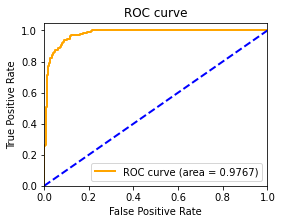

Area Under Curve: 0.9767187600488777


In [432]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = LogisticRegression(C= 100, penalty= 'l2', random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Decision Tree Classifier 

In [105]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
forest_params = {"criterion" : ['gini', 'entropy'], 
                 'max_depth':range(1,10),"min_samples_split": range(1,10),
                 "min_samples_leaf":range(1,5)}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy Score:  0.9257279443720122


Accuracy: 0.9165009940357853
Classification Error: 0.08349900596421467
Mean Cross Val (Accuracy) Score 0.916179104477612
Mean Classification Error: 0.08382089552238803


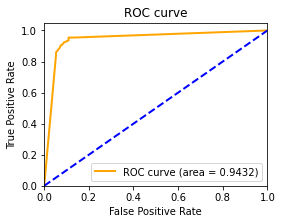

Area Under Curve: 0.9432278603125605


In [106]:
#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth= 8, min_samples_leaf= 3, min_samples_split= 2, 
                               random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc) 

### KNN Classifier

- We use a different method to determine optimal k value 

Accuracy value for k= 2 is: 0.9006  and RMSE value is: 0.31528
Accuracy value for k= 3 is: 0.90258  and RMSE value is: 0.31211
Accuracy value for k= 4 is: 0.89463  and RMSE value is: 0.3246
Accuracy value for k= 5 is: 0.89463  and RMSE value is: 0.3246
Accuracy value for k= 6 is: 0.90258  and RMSE value is: 0.31211
Accuracy value for k= 7 is: 0.91451  and RMSE value is: 0.29238
Accuracy value for k= 8 is: 0.9165  and RMSE value is: 0.28896
Accuracy value for k= 9 is: 0.92247  and RMSE value is: 0.27845
Accuracy value for k= 10 is: 0.91849  and RMSE value is: 0.2855
Accuracy value for k= 11 is: 0.92048  and RMSE value is: 0.282
Accuracy value for k= 12 is: 0.91252  and RMSE value is: 0.29576
Accuracy value for k= 13 is: 0.91252  and RMSE value is: 0.29576
Accuracy value for k= 14 is: 0.9165  and RMSE value is: 0.28896
Accuracy value for k= 15 is: 0.92247  and RMSE value is: 0.27845
Accuracy value for k= 16 is: 0.92247  and RMSE value is: 0.27845
Accuracy value for k= 17 is: 0.92843  and

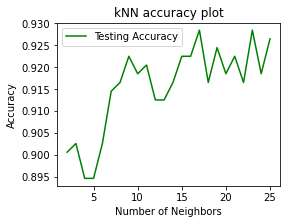

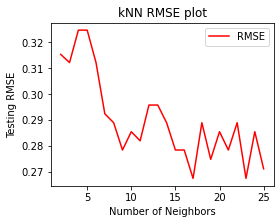


The best value is K= 17 with an accuracy of: 0.92843 and an RMSE of 0.26753
Accuracy: 0.9284294234592445
Classification Error: 0.07157057654075549
Mean Cross Val (Accuracy) Score 0.9051820895522387
Mean Classification Error: 0.09481791044776133


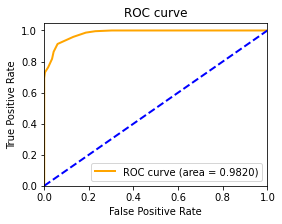

Area Under Curve: 0.982024567496302


In [108]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
accuracy = {}
error = {}
for K in range(1,25):
    K = K+1
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_value = round(metrics.accuracy_score(y_test, y_pred),5)
    accuracy.update({K: accuracy_value})
    error_value = round((mean_squared_error(y_test, y_pred, squared=False)),5)
    error.update({K: error_value})
    print('Accuracy value for k=',K,'is:', accuracy_value, ' and RMSE value is:', error_value)
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.title('kNN accuracy plot')
plt.plot(accuracy.keys(), accuracy.values(), label = 'Testing Accuracy', color="green")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.figure(figsize=(4,3))
plt.title('kNN RMSE plot')
plt.plot(error.keys(), error.values(), label = 'RMSE', color="red")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Testing RMSE')
plt.show()
print()
print('The best value is K=', max(accuracy, key=accuracy.get), 'with an accuracy of:', max(accuracy.values()), 
      'and an RMSE of', min(error.values()))

feature_cols = ['S','K','tau','r']
X = option_train[feature_cols]
y = option_train["BS"]
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Linear Discriminant Analysis 

In [433]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
forest_params = {'solver' : ['svd', 'lsqr', 'eigen']}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'solver': 'svd'}
Accuracy Score:  0.9095683036361002


Accuracy: 0.9065606361829026
Classification Error: 0.09343936381709739
Mean Cross Val (Accuracy) Score 0.9122388059701492
Mean Classification Error: 0.08776119402985083


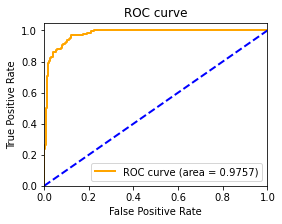

Area Under Curve: 0.9757219113769374


In [434]:
#Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
model = LinearDiscriminantAnalysis(solver = 'svd').fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Random Forest Classifier

In [110]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
forest_params = {
    'n_estimators': [100,500],
    'max_depth' : [1,3,5,7,9,11,13,15],
    'max_features': [4],
    'class_weight': ['balanced']
}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'class_weight': 'balanced', 'max_depth': 13, 'max_features': 4, 'n_estimators': 100}
Accuracy Score:  0.9351296537737216


Accuracy: 0.904572564612326
Classification Error: 0.09542743538767395
Mean Cross Val (Accuracy) Score 0.9292477611940299
Mean Classification Error: 0.07075223880597015


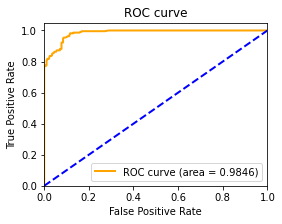

Area Under Curve: 0.9846211975046626


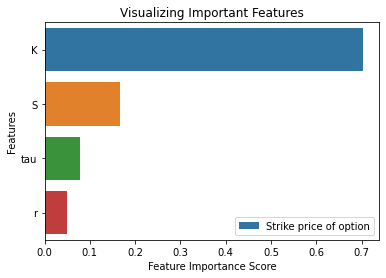

In [111]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=13, max_features= 4, 
                               class_weight='balanced', random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index, label='Strike price of option')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Gaussian Naive Bayes Classifier 

In [900]:
# Gaussian Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
forest_params = {'var_smoothing': np.logspace(0,-9, num=100)}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'var_smoothing': 0.43287612810830584}
Accuracy Score:  0.8856149500217297


Accuracy: 0.878727634194831
Classification Error: 0.12127236580516898
Mean Cross Val (Accuracy) Score 0.8757850746268657
Mean Classification Error: 0.12421492537313428


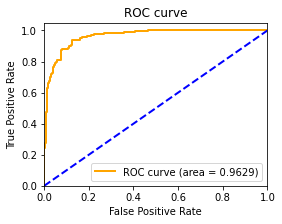

Area Under Curve: 0.9629236606855746


In [112]:
# Gaussian Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB(var_smoothing= 0.43287612810830584).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Ada Boost Classifier 

In [903]:
# Ada Boost Classifier 
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
forest_params = {'n_estimators':[100,500],'learning_rate':[0.01,.1,.5,1]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 500}
Accuracy Score:  0.9232217876285673


Accuracy: 0.9145129224652088
Classification Error: 0.08548707753479123
Mean Cross Val (Accuracy) Score 0.9221432835820894
Mean Classification Error: 0.07785671641791059


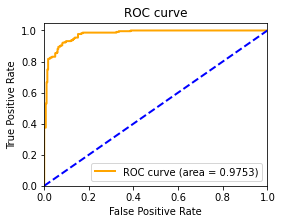

Area Under Curve: 0.975311917165091


In [113]:
# Ada Boost Classifier 
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=500,learning_rate=.5, random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Ridge Classifier 

In [913]:
#Ridge Classifier 
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
forest_params = {'alpha':np.array([.0001, .001,.01,.1,.5,1])}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'alpha': 0.0001}
Accuracy Score:  0.9087136027813993


Accuracy: 0.9065606361829026
Classification Error: 0.09343936381709739
Mean Cross Val (Accuracy) Score 0.9111820895522388
Mean Classification Error: 0.08881791044776122


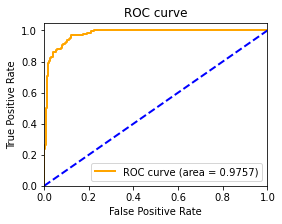

Area Under Curve: 0.9757219113769374


In [114]:
#Ridge Classifier 
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier(alpha=.0001, random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model._predict_proba_lr(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Gradient Boosting Classifier 

In [915]:
# Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
forest_params = { "learning_rate": [.001,.01,.1,.5,1], 
                 "max_depth":[1,3,5,7,9,11,13,15],  
                 "n_estimators":[100,500]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}
Accuracy Score:  0.9394248877299726


Accuracy: 0.9343936381709742
Classification Error: 0.0656063618290258
Mean Cross Val (Accuracy) Score 0.9293014925373134
Mean Classification Error: 0.07069850746268658


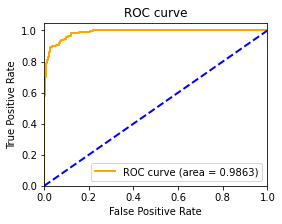

Area Under Curve: 0.9862692134542415


In [115]:
# Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3, random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Cat Boost Classifier 

- GridSearchCV was not working, we did trial an error to find the best hyperparameters. 

Accuracy: 0.9383697813121272
Classification Error: 0.06163021868787277
Mean Cross Val (Accuracy) Score 0.9312358208955225
Mean Classification Error: 0.06876417910447752


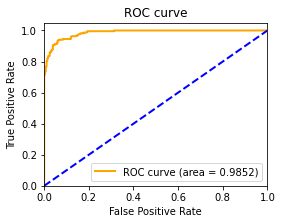

Area Under Curve: 0.9851839346581773


In [116]:
#Cat Boost Classifier 
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=9,learning_rate=1,depth=10,logging_level='Silent').fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### XGBoost Classifier

- GridSearchCV was not working, we did trial an error to find the best hyperparameters. 

Accuracy: 0.9383697813121272
Classification Error: 0.06163021868787277
Mean Cross Val (Accuracy) Score 0.9333313432835821
Mean Classification Error: 0.06666865671641786


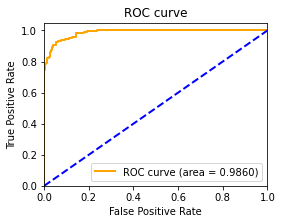

Area Under Curve: 0.9860280403884493


In [117]:
# XGBoost Classifier 
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate= 1, max_depth= 4, eta=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Extra Trees Classifier 

In [971]:
#Extra Trees Classifier 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
forest_params = {"max_depth":[1,3,5,7,9,11,13,15],  
                 "n_estimators":[100,500]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'max_depth': 11, 'n_estimators': 500}
Accuracy Score:  0.938548457192525


Accuracy: 0.9224652087475149
Classification Error: 0.07753479125248508
Mean Cross Val (Accuracy) Score 0.9319582089552239
Mean Classification Error: 0.06804179104477615


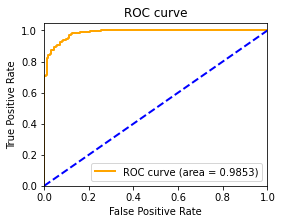

Area Under Curve: 0.9852723647823011


In [118]:
#Extra Trees Classifier 
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier(n_estimators=500, max_depth = 11, random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Support Vector Classifier (SVC)

In [980]:
#Support Vector Classifier (SVCs)
from sklearn.svm import SVC
model = SVC()
forest_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': ['scale', 'auto'],
               'decision_function_shape': ['ovo', 'ovr']}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale'}
Accuracy Score:  0.9377009995654063


Accuracy: 0.9244532803180915
Classification Error: 0.07554671968190851
Mean Cross Val (Accuracy) Score 0.9087880597014926
Mean Classification Error: 0.09121194029850743


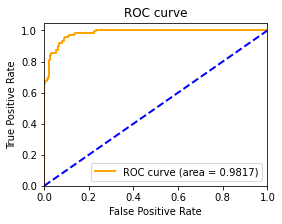

Area Under Curve: 0.9817190816129654


In [119]:
#Support Vector Machines (SVMs)
from sklearn import svm
model = svm.SVC(decision_function_shape='ovo', gamma = 'scale', C=10, probability=True).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### Quadratic Discriminant Analysis

In [989]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
forest_params = {'reg_param': [.00001, .0001, .001,.01, 0.1, .5, 1]}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'reg_param': 0.001}
Accuracy Score:  0.9215196291467478


Accuracy: 0.9244532803180915
Classification Error: 0.07554671968190851
Mean Cross Val (Accuracy) Score 0.9119402985074627
Mean Classification Error: 0.08805970149253728


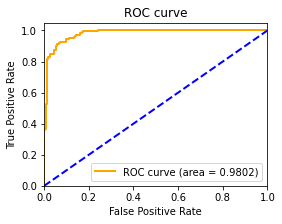

Area Under Curve: 0.9802398868094411


In [120]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis(reg_param = .001).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

### MLPClassifier

In [997]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
forest_params = {
    'alpha': [.0001, .001, 0.01, .1, .5, 1],
    'learning_rate': ['constant'],
    'solver': ['sgd', 'adam']
}
clf = GridSearchCV(model, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Parameters: ', clf.best_params_)
print('Accuracy Score: ', clf.best_score_)

Best Parameters:  {'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy Score:  0.9215196291467478


Accuracy: 0.9165009940357853
Classification Error: 0.08349900596421467
Mean Cross Val (Accuracy) Score 0.9013791044776119
Mean Classification Error: 0.09847761194029836


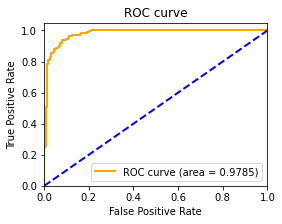

Area Under Curve: 0.9784552061225803


In [122]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(alpha= 0.0001, learning_rate= 'constant', solver= 'adam').fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Error:",1-metrics.accuracy_score(y_test, y_pred))
cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
print("Mean Cross Val (Accuracy) Score", np.mean(cross_val_score(model, X, y, cv=cv)))
print("Mean Classification Error:", 1 - np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, color='orange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('Area Under Curve:', roc_auc)

# Final Results (Predictions on Test data)

### Scale the Input Test Data 

In [28]:
#All Datasets/Scaling Test Data
option_test = pd.read_csv('option_test_wolabel.csv')
option_test = option_test[['K','S','r','tau']]
scaled = MinMaxScaler().fit(option_test)
option_test = scaled.transform(option_test)
option_test = pd.DataFrame(option_test, columns=['K','S','r','tau'])
option_test = option_test + .0000000000001
round(option_test.describe(),4)

,K,S,r,tau
count,1120.0000,1120.0000,1120.0000,1120.0000
mean,0.5233,0.5143,0.3007,0.5133
std,0.1903,0.2509,0.2288,0.2656
min,0.0000,0.0000,0.0000,0.0000
25%,0.3600,0.2717,0.1308,0.2857
50%,0.5200,0.5899,0.2616,0.5204
75%,0.6800,0.7195,0.3924,0.7245
max,1.0000,1.0000,1.0000,1.0000


## Best Classifier 

Our best classifier for this data was the XGBClassifier: 

- XGBClassifier(learning_rate= 1, max_depth= 4, eta=1)

- Mean Cross Val (Accuracy) Score =  0.9333
- Mean Classification Error = 0.0666

### 'BS' Predictions 

In [33]:
#BS Predictions 
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate= 1, max_depth= 4, eta=1).fit(X_train, y_train)
y_pred = model.predict(option_test)
y_pred = pd.DataFrame(y_pred, columns=['BS'])
y_pred.sample(3)

,BS
965,1
294,0
686,0


In [30]:
preds = pd.read_excel('group_10_prediction_.xlsx')
preds = preds.drop('BS', 1)
preds['BS'] = y_pred
preds.to_csv("group_10_prediction_.csv", index=True)

## Best Regression Equation

Our best and final regression equation is:
- Value = K + S + tau + K*S + K^2 + log(tau) + e^(K)+ 1/r + tau^K 

### 'Value' Predictions

In [412]:
#Value Predictions 
model = smf.ols('Value ~ K + S + tau + \
K*S + \
np.power(K, 2) + \
np.log(tau) + \
np.exp(K) + \
np.power(r,-1) + \
np.power(tau,K)', data=option_train_train).fit()
predictions = model.predict(option_test)
predictions = pd.DataFrame(predictions, columns=['Value'])
predictions.sample(3)

,Value
352,9.041225
690,18.069283
288,33.851223


## Final Predictions 

In [417]:
predictions['BS'] = y_pred
predictions.sample(3)

,Value,BS
1038,3.814722,1
1019,24.992202,1
147,5.614747,0


In [418]:
predictions.to_csv("group_10_prediction.csv", index=True)